In [0]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

original resolution (402, 268, 3)


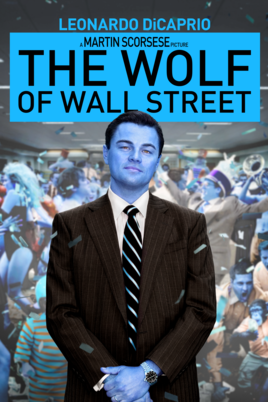

In [150]:
cvimg = cv2.imread("/content/wolf_wall.png")
print("original resolution", cvimg.shape)
Image.fromarray(cvimg)

# 1. Gaussian Pyramids

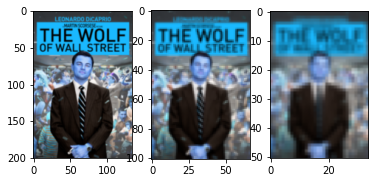

In [61]:
# calculate gaussian pyramid

g1 = cv2.pyrDown(cvimg)
g2 = cv2.pyrDown(g1)
g3 = cv2.pyrDown(g2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(g1)
ax2.imshow(g2)
ax3.imshow(g3)
plt.show()

In [0]:
# show in original size
def show_image_pyramid(g1, g2, g3):
  h1, w1 = g1.shape[:2]
  h2, w2 = g2.shape[:2]
  h3, w3 = g3.shape[:2]

  fimg = np.zeros((max(h1, h2, h3), w1+w2+w3, 3), np.uint8)

  fimg[:h1, :w1] = g1
  fimg[:h2, w1:w1+w2] = g2
  fimg[:h3, w1+w2:w1+w2+w3] = g3

  # cnct = np.concatenate((img1, img2, img3), axis=1)
  return fimg

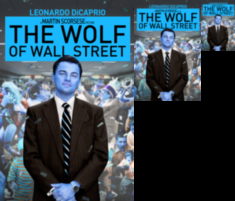

In [130]:
fimg = show_image_pyramid(g1, g2, g3)
Image.fromarray(fimg)

# 2. Laplacian Pyramid

In [120]:
print(g1.shape, cv2.pyrUp(g2).shape)
print(g2.shape, cv2.pyrUp(g3).shape)

(201, 134, 3) (202, 134, 3)
(101, 67, 3) (102, 68, 3)


Don't know why cv2.pyrUp(g2) is not returning size of g1 because of which we can't substract them, there is one pixel difference between them, lets fix this first.

In [0]:
# increase 1 pixel for h,w
def fix_size(g, offset, w_also=False): 
  if w_also:
    z1 = np.zeros((g.shape[0]+ offset, g.shape[1]+ offset, 3), np.uint8)
    z1 = np.zeros((g.shape[0]+ offset, g.shape[1]+ offset, 3), np.uint8)
  else:
    z1 = np.zeros((g.shape[0]+ offset, g.shape[1], 3), np.uint8)
  z1[:g.shape[0], :g.shape[1]] = g
  return z1

In [0]:
# calculate laplacian pyramid

L1 = fix_size(g1, 1) - cv2.pyrUp(g2)
L2 = fix_size(g2, 1, w_also=True) - cv2.pyrUp(g3)
L3 = g3

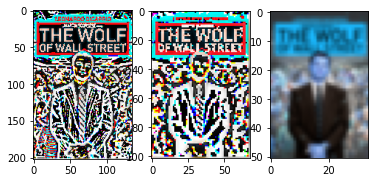

In [151]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(L1)
ax2.imshow(L2)
ax3.imshow(L3)
plt.show()

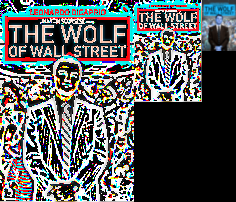

In [134]:
# show in their sizes

fimg = show_image_pyramid(L1, L2, L3)
Image.fromarray(fimg)

# 3. Reconstruct the image

In [0]:
# calculate gaussian pyramid first then apply formula

g3 = L3
g2 = L2 + cv2.pyrUp(g3)
g1 = fix_size(L1, 2, w_also=True) + cv2.pyrUp(g2)
re_img = cv2.pyrUp(g1) # restores to almost orginal size

Reconstructed Image size (408, 272, 3)


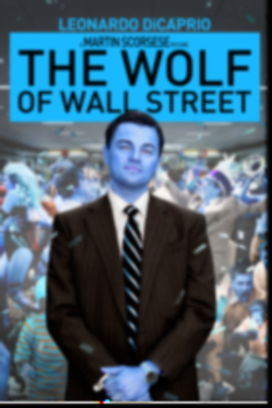

In [149]:
print("Reconstructed Image size", re_img.shape)
Image.fromarray(re_img)

Reconstructed Image is blur becuase pyrUp expands and applies blur. 